In [28]:
from utils import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
import seaborn as sn

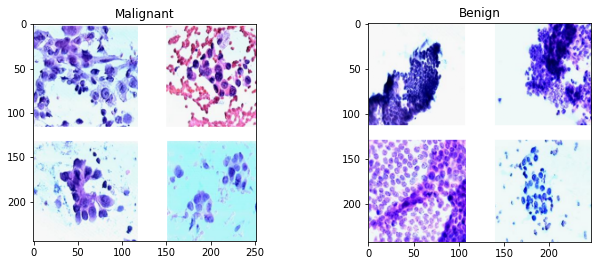

In [2]:
img1 = plt.imread('Data\\malignant.png')
img2 = plt.imread('Data\\benign.png')

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)

ax.imshow(img1)
ax.title.set_text('Malignant')

ax2.imshow(img2)
ax2.title.set_text('Benign')

plt.show()

# Data Preparation

In [3]:
# Data importing and printing
df = pd.read_csv('Data\\data.csv')
print("\nNot processed data. First 10 rows\n")
df.head(10)


Not processed data. First 10 rows



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
print('Diagnosis = B:')
df[df['diagnosis'] == 'B'].describe()

Diagnosis = B:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,0.0
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.22038,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,0.112570,0.58918,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709,0.006999,0.002938,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804,NaN
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,0.111500,0.36020,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,NaN
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,0.207300,0.79590,1.445000,15.260000,0.005212,0.011320,0.010990,0.006433,0.015600,0.002074,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090,NaN
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,0.257500,1.10800,1.851000,19.630000,0.006530,0.016310,0.018400,0.009061,0.019090,0.002808,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120,NaN
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,0.341600,1.49200,2.388000,25.030000,0.008534,0.025890,0.030560,0.011870,0.024060,0.004174,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410,NaN
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,0.881100,4.88500,5.118000,77.110000,0.021770,0.106400,0.396000,0.052790,0.061460,0.029840,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,NaN


In [6]:
print('Diagnosis = M:')
df[df['diagnosis'] == 'M'].describe()

Diagnosis = M:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,0.0
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN
std,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,0.345039,0.483178,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517,0.010065,0.002041,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553,NaN
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,0.193800,0.362100,1.334000,13.990000,0.002667,0.008422,0.011010,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,NaN
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,0.390375,0.892825,2.715500,35.762500,0.005085,0.019662,0.026998,0.011415,0.014615,0.002688,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302,NaN
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,0.547200,1.102500,3.679500,58.455000,0.006209,0.028590,0.037125,0.014205,0.017700,0.003739,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600,NaN
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,0.757300,1.429250,5.206250,94.000000,0.007971,0.038910,0.050443,0.017497,0.022132,0.004892,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625,NaN
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.568000,21.980000,542.200000,0.031130,0.135400,0.143800,0.040900,0.078950,0.012840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,NaN


In [7]:
# Adding more columns
new_col = ['radius_diff', 'texture_diff', 'perimeter_diff', 'area_diff',
           'smoothness_diff', 'compactness_diff', 'concavity_diff',
           'concave points_diff', 'symmetry_diff', 'fractal_dimension_diff']

for i, col in zip(range(len(new_col)), new_col):
    df[col] = abs(df.iloc[:, i + 2] - df.iloc[:, i + 22])
    
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,radius_diff,texture_diff,perimeter_diff,area_diff,smoothness_diff,compactness_diff,concavity_diff,concave points_diff,symmetry_diff,fractal_dimension_diff
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,7.39,6.95,61.80,1018.0,0.04380,0.38800,0.41180,0.11830,0.2182,0.04019
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,4.42,5.64,25.90,630.0,0.03906,0.10796,0.15470,0.11583,0.0938,0.03235
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,3.88,4.28,22.50,506.0,0.03480,0.26460,0.25300,0.11510,0.1544,0.02759
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,3.49,6.12,21.29,181.6,0.06730,0.58240,0.44550,0.15230,0.4041,0.07556
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,2.25,2.33,17.10,278.0,0.03710,0.07220,0.20200,0.05820,0.0555,0.01795
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN,3.02,8.05,20.83,264.5,0.05130,0.35490,0.37770,0.09321,0.1898,0.04827
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN,4.63,7.68,33.60,566.0,0.04957,0.14860,0.26570,0.11920,0.1269,0.02626
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN,3.35,7.31,20.40,319.1,0.04650,0.20370,0.17414,0.09575,0.1000,0.04059
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN,2.49,8.91,18.70,219.5,0.04300,0.34690,0.35310,0.11247,0.2028,0.03331
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN,2.63,16.64,13.68,235.5,0.06670,0.81840,0.87770,0.13557,0.2336,0.12507


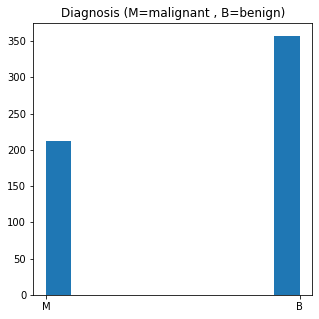

In [8]:
# data visualization
dataVisualization(df)

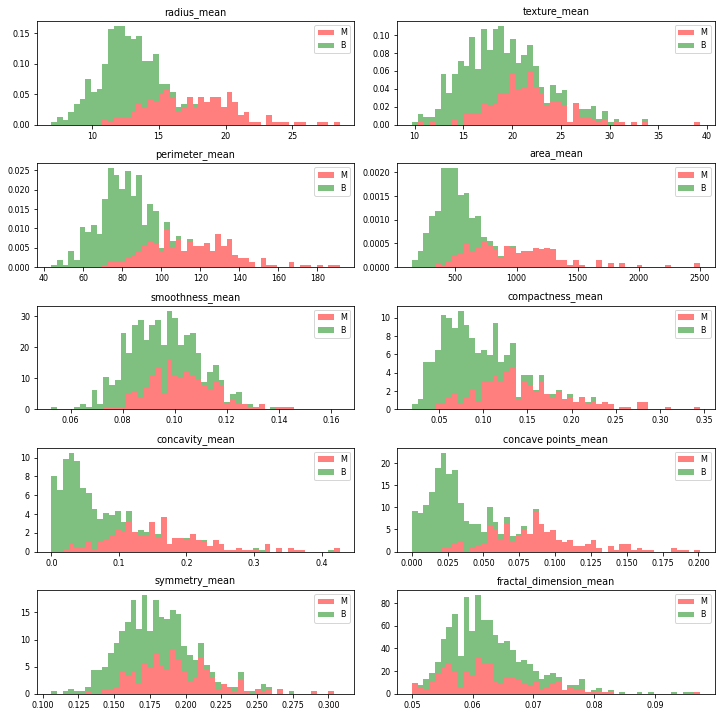

In [9]:
dataVisualization(df, 2)

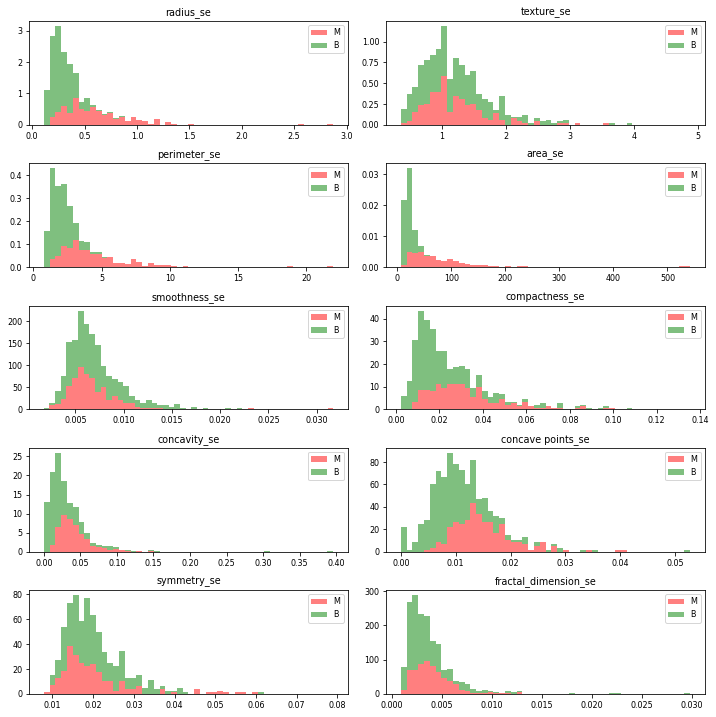

In [10]:
dataVisualization(df, 12)

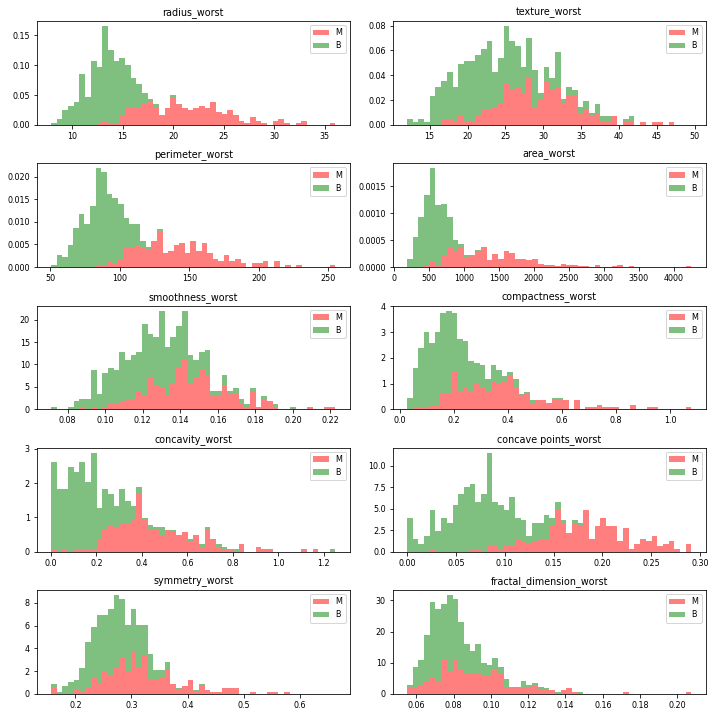

In [11]:
dataVisualization(df, 22)

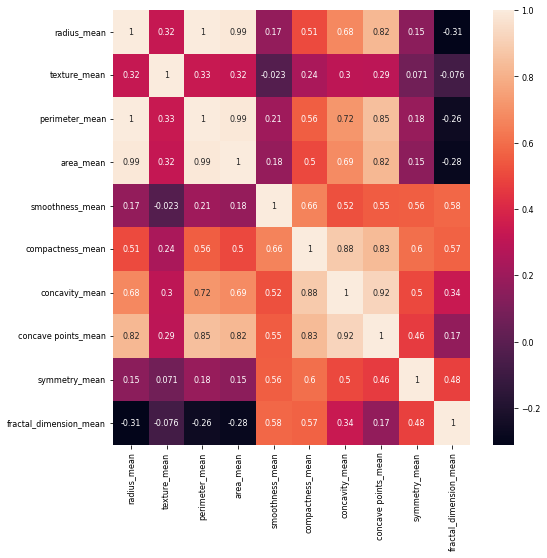

In [12]:
plt.figure(figsize = (8,8))
corrMatrix = df.iloc[:, 2:12].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

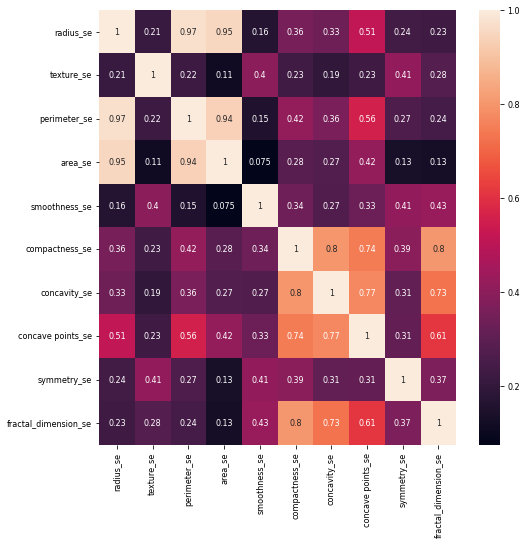

In [13]:
plt.figure(figsize = (8,8))
corrMatrix = df.iloc[:, 12:22].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

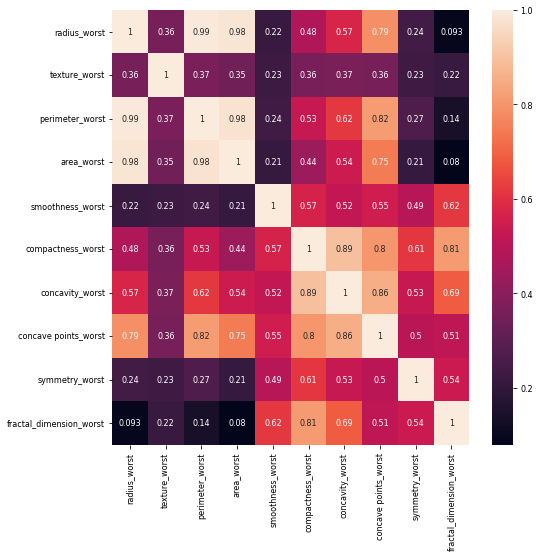

In [14]:
plt.figure(figsize = (8,8))
corrMatrix = df.iloc[:, 22:32].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
# Data pre-processing
data = dataPreparation(df)
print("\nProcessed and standardized data. First 10 rows\n")
data.head(10)


Processed and standardized data. First 10 rows



,cancer,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,1,-0.476375,-0.835335,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,-0.255070,-0.592662,0.156347,0.445544,0.160025,-0.069124,0.134119,0.486846,-0.165498,-0.313836,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1,1.170908,0.160649,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,0.149883,-0.804940,-0.909030,-0.651568,-0.310141,-0.228089,-0.829666,-0.611218,1.368983,0.322883,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,1,-0.118517,0.358450,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,0.643623,0.290561,0.588031,0.268933,-0.232554,0.435349,-0.688004,0.611669,0.163763,0.401048,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,1,-0.320167,0.588830,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,-0.356850,-0.389818,-0.436677,0.533290,0.120568,0.075243,0.107482,-0.017363,-0.161357,0.822813,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,1,-0.473535,1.105439,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,-0.388250,0.693345,0.036008,2.609587,1.509848,0.409395,-0.321136,2.377346,-0.244190,2.443109,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [16]:
# Split into X and y
X, y = XYSplit(data)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
print("The shapes of X_train, X_test, y_train, y_test:", X_train.shape, X_test.shape, y_train.shape, y_test.shape, '\n')

The shapes of X_train, X_test, y_train, y_test: (426, 24) (143, 24) (426,) (143,) 



# Training

In [17]:
# logistic regression training
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Initialize SVM classifier
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, y_train)

# neural network model
model, callbacks = modelCreate()
model.summary()

# neural network training
print('\nTraining started...\n')
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[callbacks], verbose=0)
print(f'Training took {len(history.history["loss"])} epochs')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1250      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
Output (Dense)               (None, 1)                 21        
Total params: 2,291
Trainable params: 2,291
Non-trainable params: 0
_________________________________________________________________

Training started...

Training took 593 epochs


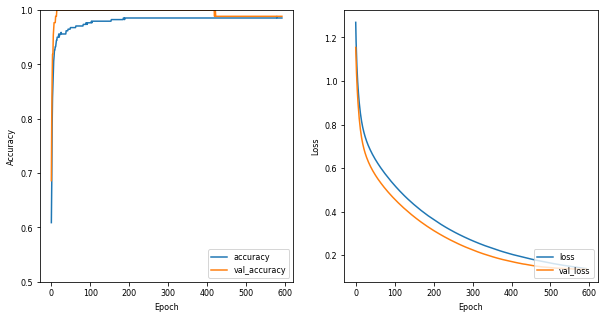

In [18]:
# Neural network training history
trainingPlot(history)

# Testing

In [19]:
# logistic regression testing
scoreLR = logreg.score(X_test, y_test)

# Support Vector Machine testing
scoreSVM = SVM.score(X_test, y_test)

# neural network testing
scoreNN = model.evaluate(X_test, y_test, verbose=0)[1]

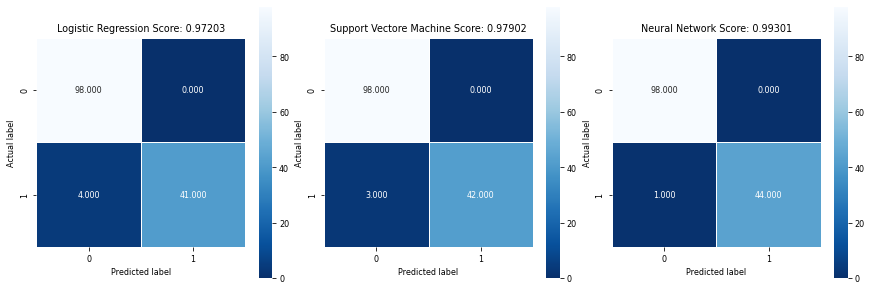

In [29]:
# predictions
predictionsLR = logreg.predict(X_test)
cmLR = metrics.confusion_matrix(y_test, predictionsLR)

predictionsNN = model.predict(X_test)
predictionsNN = list(map(lambda x: 0 if x < 0.5 else 1, predictionsNN))
cmNN = metrics.confusion_matrix(y_test, predictionsNN)

predictionsSVM = SVM.predict(X_test)
cmSVM = metrics.confusion_matrix(y_test, predictionsSVM)

# confusion matrices
confusionMatrix(cmLR, scoreLR, cmSVM, scoreSVM, cmNN, scoreNN)

In [31]:
print('Logistic Regression testing accuracy', round(scoreLR, 3))

# Precision (Accuracy of positive predictions)
precisionLR = cmLR[1,1]/(cmLR[0,1]+cmLR[1,1])
print('Precision of Logistic Regression: ', round(precisionLR, 3))

# Sensitivity=Recall (True Positive Rate)
sensitivityLR = cmLR[1,1]/(cmLR[1,0]+cmLR[1,1])
print('Sensitivity/Recall of Logistic Regression: ', round(sensitivityLR, 3))

# Specificity (True Negative Rate)
specificityLR = cmLR[0,0]/(cmLR[0,0]+cmLR[0,1])
print('Specificity of Logistic Regression: ', round(specificityLR, 3))

# F1-Score (Percent of correct positive predictions)
f1LR = 2*(sensitivityLR*precisionLR) / (sensitivityLR+precisionLR)
print('F-1 Score of Logistic Regression: ', round(specificityLR, 3))

# TN FP
# FN TP

Logistic Regression testing accuracy 0.972
Precision of Logistic Regression:  1.0
Sensitivity/Recall of Logistic Regression:  0.911
Specificity of Logistic Regression:  1.0
F-1 Score of Logistic Regression:  1.0


In [32]:
print('Support Vector Machine testing accuracy', round(scoreSVM, 3))

# Precision (Accuracy of positive predictions)
precisionSVM = cmSVM[1,1]/(cmSVM[0,1]+cmSVM[1,1])
print('Precision of Support Vector Machine: ', round(precisionSVM, 3))

# Sensitivity=Recall (True Positive Rate)
sensitivitySVM = cmSVM[1,1]/(cmSVM[1,0]+cmSVM[1,1])
print('Sensitivity/Recall of Support Vector Machine: ', round(sensitivitySVM, 3))

# Specificity (True Negative Rate)
specificitySVM = cmSVM[0,0]/(cmSVM[0,0]+cmSVM[0,1])
print('Specificity of Support Vector Machine: ', round(specificitySVM, 3))

# F1-Score (Percent of correct positive predictions)
f1SVM = 2*(sensitivitySVM*precisionSVM) / (sensitivitySVM+precisionSVM)
print('F-1 Score of Support Vector Machine: ', round(specificitySVM, 3))

# TN FP
# FN TP

Support Vector Machine testing accuracy 0.979
Precision of Support Vector Machine:  1.0
Sensitivity/Recall of Support Vector Machine:  0.933
Specificity of Support Vector Machine:  1.0
F-1 Score of Support Vector Machine:  1.0


In [33]:
print('Neural Network testing accuracy', round(scoreNN, 3))

# Precision (Accuracy of positive predictions)
precisionNN = cmNN[1,1]/(cmNN[0,1]+cmNN[1,1])
print('Precision of Neural Network: ', round(precisionNN, 3))

# Sensitivity=Recall (True Positive Rate)
sensitivityNN = cmNN[1,1]/(cmNN[1,0]+cmNN[1,1])
print('Sensitivity/Recall of Neural Network: ', round(sensitivityNN, 3))

# Specificity (True Negative Rate)
specificityNN = cmNN[0,0]/(cmNN[0,0]+cmNN[0,1])
print('Specificity of Neural Network: ', round(specificityNN, 3))

# F1-Score (Percent of correct positive predictions)
f1NN = 2*(sensitivityNN*precisionNN) / (sensitivityNN+precisionNN)
print('F-1 Score of Neural Network: ', round(specificityNN, 3))

# TN FP
# FN TP

Neural Network testing accuracy 0.993
Precision of Neural Network:  1.0
Sensitivity/Recall of Neural Network:  0.978
Specificity of Neural Network:  1.0
F-1 Score of Neural Network:  1.0
